In [1]:
import numpy as np

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from importlib import reload
from random import choice
reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [4]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: D0,D5,D7,C1,C4,C7,C8,H6,S2,S6,S7,S8.
Size: 12
-----------------------

0:--- Card Collection ---
Cards: D3,C3,C5,H1,S0,S1.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: D2,D8,C2,H3,H7,S5.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D4,C0,H2,H4,H5,S3.
Size: 6
-----------------------

3:--- Card Collection ---
Cards: D1,D6,C6,H0,H8,S4.
Size: 6
-----------------------

Trump suit is Clubs
---------------------



In [5]:
p_att_idx = durak_game.playing_field.players_on_attack[0]
possibleAttacks = [i for i,v in np.ndenumerate(durak_game.playing_field.get_legal_moves(p_att_idx)) if v == 1]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D1,D6,C6,H0,H8,S4.
Size: 6
-----------------------



In [6]:
p_def_idx = durak_game.playing_field.player_on_defense
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D3,C3,C5,H1,S0,S1.
Size: 6
-----------------------



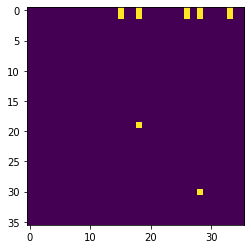

In [7]:
durak_game.playing_field.attacks[possibleAttacks[0]] = 1
durak_game.playing_field.attacks[possibleAttacks[1]] = 1
durak_game.playing_field.attacks[possibleAttacks[2]] = 1
durak_game.playing_field.attacks[possibleAttacks[3]] = 1
durak_game.playing_field.attacks[possibleAttacks[4]] = 1
durak_game.playing_field.attacks[possibleAttacks[5]] = 1
plt.imshow(durak_game.playing_field.get_legal_moves(p_def_idx))

In [8]:
attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
nontrump_attack_idxs = attack_idxs[attack_idxs >= durak_game.playing_field.n_vals]

In [9]:
from math import ceil
valid_defenses = np.zeros_like(durak_game.playing_field.field)
f = lambda x : (x // durak_game.playing_field.n_vals + 1)*durak_game.playing_field.n_vals

In [10]:
for att_idx in attack_idxs:
    valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1

for att_idx in nontrump_attack_idxs:
    valid_defenses[:durak_game.playing_field.n_vals, att_idx] = 1

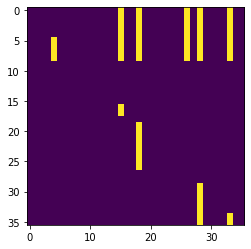

In [11]:
plt.imshow(valid_defenses)

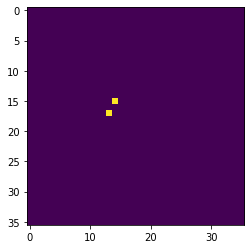

In [12]:
field = durak_game.playing_field.field
field[15,14] = 1
field[17,13] = 1
plt.imshow(field)

In [13]:
print(Cards._CARD_MAP_SMALL[15//9, 15%9], Cards._CARD_MAP_SMALL[14//9, 14%9], Cards._CARD_MAP_SMALL[17//9, 17%9], Cards._CARD_MAP_SMALL[13//9, 13%9])

C6 C5 C8 C4


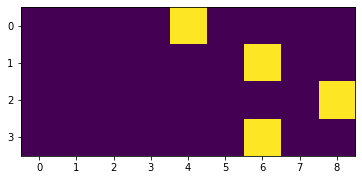

In [14]:
plt.imshow(durak_game.playing_field.get_legal_moves(p_att_idx))

In [15]:
attack_idxs = np.nonzero(durak_game.playing_field.get_legal_moves(p_att_idx))
attack_idxs

(array([0, 1, 2, 3]), array([4, 6, 8, 6]))

In [16]:
valid_attacks = np.zeros_like(durak_game.playing_field.get_legal_moves(p_att_idx))

In [17]:
durak_game.get_game_ended()

False